# 강서구 어린이 보호구역 증설 제언을 위한 지리데이터 전처리 및 EDA
### **작업기간**
- 2023.03.18 ~ 2023.03.24  

### **작업목표**
- 어린이 보호구역 증설 후보지 탐색 
- MCLP 최적지 선정 모델의 학습 데이터 생성

# 0. 환경설정

## 0.0) Colab 사용 시 실행: 글꼴 설정 및 드라이브 마운트  
코랩 환경 미사용 시 실행하지 마세요.

In [ ]:
# 한글 글꼴 설치, 이 셀 실행 후 런타임 다시 시작 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 0.1) 라이브러리 설치, 임포트 및 설정

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 데이터프레임 조회 옵션: 폭 한도 변경
pd.options.display.max_columns = 100

In [ ]:
# 글꼴 설정(한글 깨짐 방지)
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
#작업 디렉토리 설졍
import os
working_directory = '/content/drive/MyDrive/project_folder' # 사용자의 작업 경로 입력
os.chdir(working_directory)

cwd = os.getcwd()

# 1. 데이터 준비

## 1.1) 수요지 및 가중치: 강서구 100m 격자별 유아/초등학생/중학생/고등학생+성별 별 인구 수  
- 어린이 보호구역의 수요를 예측하는 데에 영유아 거주인원이 주요한 지표라고 판단
- 어린이 보호구역은 만12세 이하의 어린이를 보호하는 것이 주된 목표이나, [중학생과 고등학생이 교통사고 피해자 연령대에서 어린이 못지않은 비율을 차지](https://https://kosis.kr/statHtml/statHtml.do?orgId=132&tblId=DT_13204_501)하므로 추후 데이터 분석 및 제언을 위해 지표를 추가

### 원본데이터 불러오기
출처: [국토정보플랫폼 국토정보맵 국토통계지도](http://map.ngii.go.kr/ms/map/NlipMap.do?tabGb=statsMap)  

In [ ]:
u6_f = gpd.read_file(cwd+'/data/raw/100m격자별_연령별_성별_인구수/(B100)국토통계_인구정보-유아 인구 수(여자)-(격자) 100M_서울특별시 강서구_202210/nlsp_021001015.shp', encoding = 'utf-8')
u6_m = gpd.read_file(cwd+'/data/raw/100m격자별_연령별_성별_인구수/(B100)국토통계_인구정보-유아 인구 수(남자)-(격자) 100M_서울특별시 강서구_202210/nlsp_021001014.shp', encoding = 'utf-8')
u12_f = gpd.read_file(cwd+'/data/raw/100m격자별_연령별_성별_인구수/(B100)국토통계_인구정보-초등학생 인구 수(여자)-(격자) 100M_서울특별시 강서구_202210/nlsp_021001018.shp', encoding = 'utf-8')
u12_m= gpd.read_file(cwd+'/data/raw/100m격자별_연령별_성별_인구수/(B100)국토통계_인구정보-초등학생 인구 수(남자)-(격자) 100M_서울특별시 강서구_202210/nlsp_021001017.shp', encoding = 'utf-8')
u15_f= gpd.read_file(cwd+'/data/raw/100m격자별_연령별_성별_인구수/(B100)국토통계_인구정보-중학생 인구 수(여자)-(격자) 100M_서울특별시 강서구_202210/nlsp_021001021.shp', encoding = 'utf-8')
u15_m= gpd.read_file(cwd+'/data/raw/100m격자별_연령별_성별_인구수/(B100)국토통계_인구정보-중학생 인구 수(남자)-(격자) 100M_서울특별시 강서구_202210/nlsp_021001020.shp', encoding = 'utf-8')
u19_f= gpd.read_file(cwd+'/data/raw/100m격자별_연령별_성별_인구수/(B100)국토통계_인구정보-고등학생 인구 수(여자)-(격자) 100M_서울특별시 강서구_202210/nlsp_021001024.shp',encoding = 'utf-8')
u19_m = gpd.read_file(cwd+'/data/raw/100m격자별_연령별_성별_인구수/(B100)국토통계_인구정보-고등학생 인구 수(남자)-(격자) 100M_서울특별시 강서구_202210/nlsp_021001023.shp', encoding = 'utf-8')

### 데이터 전처리 및 병합

In [ ]:
# 병합 전 
u6_f.rename({'val':f'유아여성인구수'}, axis=1, inplace = True)
u6_m.rename({'val':f'유아남성인구수'}, axis=1, inplace = True)
u12_f.rename({'val':f'초등학생여성인구수'}, axis=1, inplace = True)
u12_m.rename({'val':f'초등학생남성인구수'}, axis=1, inplace = True)
u15_f.rename({'val':f'중학생여성인구수'}, axis=1, inplace = True)
u15_m.rename({'val':f'중학생남성인구수'}, axis=1, inplace = True)
u19_f.rename({'val':f'고등학생여성인구수'}, axis=1, inplace = True)
u19_m.rename({'val':f'고등학생남성인구수'}, axis=1, inplace = True)

In [ ]:
# 반복 작업을 위한 gdf의 리스트 생성
gdf_list = [ u6_f,u6_m,u12_f,u12_m,u15_f,u15_m,u19_f,u19_m ]

In [ ]:
# 값이 없으면 결측치가 아닌 0명인 경우이므로, 0으로 결측치 채우기
for i in gdf_list:
  i.fillna(0, inplace = True)

In [ ]:
all_youth = gdf_list[0] # 첫 geodataframe에 리스트의 첫 요소 넣기

for gdf in gdf_list[1:]: # all_youth에 다음 요소들을 merge하여 데이터 병합
  all_youth = all_youth.merge(gdf, left_on = 'geometry', right_on = 'geometry')

/usr/local/lib/python3.9/dist-packages/geopandas/geodataframe.py:1470: FutureWarning: Passing 'suffixes' which cause duplicate columns {'lbl_x', 'gid_x'} in the result is deprecated and will raise a MergeError in a future version.
  result = DataFrame.merge(self, *args, **kwargs)
/usr/local/lib/python3.9/dist-packages/geopandas/geodataframe.py:1470: FutureWarning: Passing 'suffixes' which cause duplicate columns {'lbl_x', 'gid_x'} in the result is deprecated and will raise a MergeError in a future version.
  result = DataFrame.merge(self, *args, **kwargs)
/usr/local/lib/python3.9/dist-packages/geopandas/geodataframe.py:1470: FutureWarning: Passing 'suffixes' which cause duplicate columns {'lbl_x', 'gid_x'} in the result is deprecated and will raise a MergeError in a future version.
  result = DataFrame.merge(self, *args, **kwargs)


In [ ]:
# gid 는 격자의 id, lbl은 인구수와 동일한 값. 데이터의 독립적인 의미가 없으므로 추후 삭제
all_youth.head(3)

,gid_x,lbl_x,유아여성인구수,geometry,gid_y,lbl_y,유아남성인구수,gid_x,lbl_x,초등학생여성인구수,gid_y,lbl_y,초등학생남성인구수,gid_x,lbl_x,중학생여성인구수,gid_y,lbl_y,중학생남성인구수,gid_x,lbl_x,고등학생여성인구수,gid_y,lbl_y,고등학생남성인구수
0,다사404502,11.00,11.0,"POLYGON ((940400.000 1950200.000, 940400.000 1...",다사404502,9.00,9.0,다사404502,21.00,21.0,다사404502,13.00,13.0,다사404502,N/A,0.0,다사404502,6.00,6.0,다사404502,7.00,7.0,다사404502,11.00,11.0
1,다사391528,N/A,0.0,"POLYGON ((939100.000 1952800.000, 939100.000 1...",다사391528,0,0.0,다사391528,0,0.0,다사391528,N/A,0.0,다사391528,N/A,0.0,다사391528,0,0.0,다사391528,0,0.0,다사391528,N/A,0.0
2,다사402503,28.00,28.0,"POLYGON ((940200.000 1950300.000, 940200.000 1...",다사402503,23.00,23.0,다사402503,39.00,39.0,다사402503,24.00,24.0,다사402503,15.00,15.0,다사402503,9.00,9.0,다사402503,19.00,19.0,다사402503,15.00,15.0


In [ ]:
 #필요한 컬럼(인구수 + 위치 정보)만 추출
all_youth = all_youth[[
    '유아여성인구수','유아남성인구수', '초등학생여성인구수', '초등학생남성인구수', '중학생여성인구수', '중학생남성인구수', '고등학생여성인구수', '고등학생남성인구수', 'geometry'
]]

In [ ]:
# 미성년 총인구 추출
all_youth['미성년총인구'] = all_youth[[
    '유아여성인구수','유아남성인구수', '초등학생여성인구수', '초등학생남성인구수', '중학생여성인구수', '중학생남성인구수', '고등학생여성인구수', '고등학생남성인구수'
]].sum(axis=1)

/usr/local/lib/python3.9/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
# 초등학생(만 12세) 이하 총인구 추출
all_youth['만12세이하총인구'] = all_youth[[
    '유아여성인구수','유아남성인구수', '초등학생여성인구수', '초등학생남성인구수'
]].sum(axis=1)

/usr/local/lib/python3.9/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
# 좌표계 통일
all_youth.to_crs('epsg:5179', inplace = True) 

In [ ]:
# 결과 확인
all_youth.head(5)

,유아여성인구수,유아남성인구수,초등학생여성인구수,초등학생남성인구수,중학생여성인구수,중학생남성인구수,고등학생여성인구수,고등학생남성인구수,geometry,미성년총인구,만12세이하총인구
0,11.0,9.0,21.0,13.0,0.0,6.0,7.0,11.0,"POLYGON ((940400.000 1950200.000, 940400.000 1...",78.0,54.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((939100.000 1952800.000, 939100.000 1...",0.0,0.0
2,28.0,23.0,39.0,24.0,15.0,9.0,19.0,15.0,"POLYGON ((940200.000 1950300.000, 940200.000 1...",172.0,114.0
3,18.0,16.0,43.0,43.0,19.0,16.0,14.0,12.0,"POLYGON ((940000.000 1951800.000, 940000.000 1...",181.0,120.0
4,0.0,0.0,9.0,8.0,0.0,0.0,0.0,6.0,"POLYGON ((942900.000 1950500.000, 942900.000 1...",23.0,17.0


In [ ]:
# 한글 변환으로 인해 shp파일로 저장하는 데 어려움이 있으므로 csv로 저장. 이후 gpd.Geopandas(객체명)으로 gpd.gdf형식으로의 전환 가능
all_youth.to_csv(cwd+'/data/processed/수요지_전체위치/수요지_전체위치.csv', encoding = 'cp949')

## 1.2) 후보지: 초등학교 / 중학교 / 고등학교 / 아동센터 / 학원
- 어린이 보호구역은 특정 보육/교육시설을 지정하여 인근의 도로를 일부 선정하는 방식으로 정해짐. 따라서 추가 보호구역 선정의 후보지로써 초등학교, 아동센터, 학원 보습소 등이 포함됨.
- 인구 정보에 중학생/고등학생이 추가된 것과 마찬가지의 사유로 중/고등학교 추가

### 원본데이터 불러오기
강서구 학교: [서울 열린데이터 광장](http://data.seoul.go.kr/dataList/OA-20518/S/1/datasetView.do)  
학원교습소: [서울 열린데이터 광장](http://data.seoul.go.kr/dataList/OA-20545/S/1/datasetView.do)  
유치원: [서울 열린데이터 광장](https://data.seoul.go.kr/dataList/OA-20316/A/1/datasetView.do)  
아동센터: [공공데이터포털](https://www.data.go.kr/data/15083558/fileData.do?recommendDataYn=Y)  



상기 데이터를 [지오서비스웹](http://www.geoservice.co.kr:777/) 서비스를 활용하여 지오코딩(도로명 주소를 위/경도 좌표로 변환). 지오코딩 결과를 utm-k(epsg:5179)로 재변환하여 통합하였음.

In [ ]:
#강서구 학교 데이터
schools = gpd.read_file(cwd+'/data/raw/수요지_교육보육시설/강서구학교_지오코딩/강서구학교.shp',encoding='utf8')
schools.head(2)

,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,_GC_TYPE,geometry
0,중학교,사립,7081524,화곡중학교,Hwagok Middle School,서울특별시강서양천교육지원청,07638,서울특별시 강서구 강서로45길 70,(내발산동/화곡중학교),070-8644-6400,http://www.hwagok.ms.kr,02-2662-2943,남,NaN,N,일반계,NaN,전기,주간,19740105,19740105,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230226,정,POINT (126.83261 37.54916)
1,중학교,공립,7081540,마곡하늬중학교,MagokHanui,서울특별시강서양천교육지원청,07810,서울특별시 강서구 마곡서1로 16,(마곡동),0269855900,http://magokhanui.sen.ms.kr,0269855958,남여공학,NaN,N,NaN,NaN,전기,주간,20200301,20200301,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230226,정,POINT (126.82099 37.55817)


In [ ]:
# 시설명, 도로명주소, geometry만 따로 
location_school = schools[[ 'field4'	,'field8', 'geometry']].rename(columns = { 'field4':'시설명'	,'field8':'도로명주소'})

In [ ]:
#강서구 학원교습소 데이터
academy = gpd.read_file(cwd+'/data/raw/수요지_교육보육시설/강서구학원_지오코딩/강서구학원교습소.shp',encoding='utf8')
academy.head(2)

,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,_GC_TYPE,geometry
0,강서구,학원,1000030074,하봄음악학원,서울특별시 강서구 초록마을로 31,/ 2층 (화곡동/ 화성음악학원),예능(대),예능(중),음악/,음악,60,60,NaN,Y,N,157866,개원,19791016,NaN,NaN,19791016,20230305,정,POINT (126.84694 37.54307)
1,강서구,학원,1000030534,수미미술학원,서울특별시 강서구 강서로17길 130,/ 1 (화곡동),예능(대),예능(중),미술/,미술,20,80,NaN,Y,N,07766,개원,19790915,NaN,NaN,19790915,20230226,정,POINT (126.83854 37.53217)


In [ ]:
# 시설명, 도로명주소, geometry만 따로 
location_academy = academy[[ 'field4'	,'field5', 'geometry']].rename(columns = { 'field4':'시설명'	,'field5':'도로명주소'})

In [ ]:
#강서구 유치원 데이터
kinder = gpd.read_file(cwd+'/data/raw/수요지_교육보육시설/강서구어린이집_지오코딩/강서구어린이집.shp',encoding='utf8')
kinder.head(1)

,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,field30,field31,field32,field33,field34,field35,field36,field37,field38,field39,field40,field41,field42,field43,field44,field45,field46,field47,field48,field49,field50,field51,field52,field53,field54,field55,field56,field57,field58,field59,field60,field61,field62,_GC_TYPE,geometry
0,강서구,11500000749,청정원 마곡 어린이집,직장,정상,07616,서울특별시 강서구 초원로16길 12,02-2664-1613,NaN,https://www.puruni.com/chungjungonemagok,4,170,0,0,6,49,9,37.566949326128544,126.8150605330501,NaN,2022-06-14,NaN,NaN,NaN,2022-10-26,일반,0,1,2,0,0,0,0,1,0,4,0,2,5,0,0,0,0,2,0,9,100,0,0,0,0,1,4,0,0,0,0,0,1,0,6,2022-10-26 22:04:07.0,정,POINT (126.81503 37.56692)


In [ ]:
location_kinder = kinder[[ 'field3'	,'field7', 'geometry']].rename(columns = {'field3':'시설명'	,'field7':'도로명주소'})

In [ ]:
# 강서구 아동센터 데이터
center = gpd.read_file(cwd+'/data/raw/수요지_교육보육시설/강서구아동센터_지오코딩/강서구아동센터.shp',encoding='utf8')
center.head(2)

,field1,field2,field3,field4,_GC_TYPE,geometry
0,1,강서누리지역아동센터,"서울특별시 강서구 송정로 32, 2층",99,정,POINT (126.81146 37.55789)
1,2,경향지역아동센터,서울특별시 강서구 화곡로63길 19 (등촌동),85.2,정,POINT (126.85163 37.55721)


In [ ]:
location_center = center[[ 'field2'	,'field3', 'geometry']].rename(columns = { 'field2':'시설명'	,'field3':'도로명주소'})

### 데이터 전처리 및 병합

In [ ]:
#위에서 컬럼 통일해줬으므로 바로 concat 가능
whole_location = pd.concat([location_school, location_academy, location_kinder, location_center], ignore_index=True)

In [ ]:
#모든 좌표계가 한국 기준 위경도 좌표계이다. 이것을 utm 한국 좌표계인 epsg 5179로 통일
whole_location.to_crs('epsg:5179', inplace = True)

In [ ]:
whole_location.head(5)

,시설명,도로명주소,geometry
0,화곡중학교,서울특별시 강서구 강서로45길 70,POINT (941047.900 1950189.400)
1,마곡하늬중학교,서울특별시 강서구 마곡서1로 16,POINT (940028.060 1951196.400)
2,명덕여자중학교,서울특별시 강서구 강서로47길 34-10,POINT (941242.060 1950644.600)
3,마포중학교,서울특별시 강서구 화곡로 403,POINT (942958.100 1951340.500)
4,신정여자중학교,서울특별시 강서구 등촌로13아길 20,POINT (943199.440 1948978.600)


In [ ]:
# 후보지 전체 데이터 저장
whole_location.to_file(cwd+'/data/processed/후보지_전체위치/후보지_전체위치.shp', encoding = 'cp949')

## 1.3) 기존 어린이 보호구역 및 관련 지표 데이터  

### 원본데이터 불러오기
어린이 보호구역 사고건수: [TAAS 교통사고분석시스템 > GIS공간분석](https://taas.koroad.or.kr/web/shp/mik/main.do?menuId=WEB_KMP) 의 조회기능 활용하여 2019~2021년 사고 건수 수집

수집 이후 excel 편집기능 활용하여 도로명 주소 기입하여 csv 파일 생성  
csv파일을 도로명 주소 기준으로 지오코딩하여 shp파일 생성

In [ ]:
# 사고건수 csv파일을 shp 형태로 변환한 파일 
child_protect = gpd.read_file(cwd+'/data/raw/어린이보호구역_사고건수/어린이보호구역_데이터_지오코딩결과/어린이보호구역_사고건수.shp', encoding = 'utf-8')

In [ ]:
child_protect = child_protect.to_crs('epsg:5179')

In [ ]:
child_protect.head(2)
# 기존 column 정보가 사라짐을 확인

,field1,field2,field3,field4,field5,field6,field7,field8,_GC_TYPE,geometry
0,가양초등학교,초등학교,서울특별시 강서구 허준로 186 (가양동),5,7,111,16,0,정,POINT (943375.060 1951568.100)
1,강서유치원,유치원,서울특별시 강서구 까치산로18길 7-19 (화곡동),1,0,14,3,0,정,POINT (942612.000 1950070.200)


In [ ]:
#  기존 csv파일에서 컬럼명만 가져오기
child_protect_columns = pd.read_csv(cwd+'/data/raw/어린이보호구역_사고건수/강서구_어린이보호구역사고건수_2019-2021.csv', encoding = 'cp949').columns

In [ ]:
child_protect_columns

Index(['시설명', '시설종류', '도로명주소', '어린이보호구역지정수', 'CCTV수', '도로표지판수', '과속방지턱수',
       '어린이보행자사고건수'],
      dtype='object')

In [ ]:
#지오코딩하며 추가된 비정보 컬럼 삭제
child_protect.drop('_GC_TYPE',axis=1,inplace = True)

In [ ]:
# 새 컬럼 리스트 만들어 지오코딩으로 인해 생성된 geometry 행 추가
new_cols = list(child_protect_columns)
new_cols.append('geometry')

In [ ]:
# 새 컬럼 대입
child_protect.columns = new_cols 

In [ ]:
# 불필요 컬럼 제거
child_protect.drop('시설종류', axis = 1, inplace = True)

In [ ]:
child_protect

,시설명,도로명주소,어린이보호구역지정수,CCTV수,도로표지판수,과속방지턱수,어린이보행자사고건수,geometry
0,가양초등학교,서울특별시 강서구 허준로 186 (가양동),5,7,111,16,0,POINT (943375.060 1951568.100)
1,강서유치원,서울특별시 강서구 까치산로18길 7-19 (화곡동),1,0,14,3,0,POINT (942612.000 1950070.200)
2,개화초등학교,서울특별시 강서구 양천로 11 (방화동),3,5,65,6,0,POINT (938597.900 1952957.000)
3,곰달래어린이집,서울특별시 강서구 곰달래로53길 30-20 (화곡동),1,1,4,2,0,POINT (943473.000 1948451.800)
4,공공직장어린이집,서울특별시 강서구 강서로33가길 42 (화곡동),1,0,6,0,0,POINT (941509.060 1949565.500)
...,...,...,...,...,...,...,...,...
88,정곡초등학교,서울특별시 강서구 방화대로50길 22 (방화동),4,7,88,11,1,POINT (939888.560 1953291.800)
89,화곡초등학교,서울특별시 강서구 초록마을로 28 (화곡동),6,6,69,18,0,POINT (942181.750 1949553.900)
90,하늘숲어린이집,서울특별시 강서구 강서로45다길 102 (화곡동),1,1,12,2,0,POINT (941201.940 1949545.800)
91,프란치스코어린이집,서울특별시 강서구 송정로1길 13 (공항동),1,1,4,3,1,POINT (939193.500 1950975.000)


## 1.4) 지리정보 EDA를 위한 강서구 법정동 지도 데이터  
추후 시각화 및 법정동 정보의 반영시 활용

### 원본 데이터 불러오기
읍면동 SHP파일 출처: [공간정보시스템/딥러닝 기반 기술 연구소](https://www.gisdeveloper.co.kr/)  

In [ ]:
# 강서구 각 행정동을 지도에서 표시하기 위한 배경 지도 만들기: 읍면동에서 강서구 해당영역만 뽑기
emd = gpd.read_file('/content/drive/MyDrive/강서구공모전_/양재혁/EMD_202302/emd.shp', encoding = 'cp949')

gangseo_dong = emd[emd['EMD_CD'].str.startswith('11500')].set_crs('epsg:5179')

## 1.5) 최종 데이터프레임 통합
1. 위치 기반으로 후보지와 기존 어린이 보호구역 리스트를 먼저 수합(후보지에 대해 inner join한 뒤 결측치를 0으로 채우면 수요지 여부와 기존 어린이 보호구역의 각종 지표를 한 번에 확인 가능

2. 100m 격자별 인구 수 데이터와 1.의 지리데이터를 위치 기반으로 결합(sjoin)  
==> 기존 어린이 보호구역 및 후보지 인근의 인구정보를 후보지에 연결

3. 읍면동 데이터의 법정동 정보를 위치 기반으로 결합

### 후보지와 기존 어린이 보호구역 결합

In [ ]:
# 지리정보 기반으로 후보지역과 기존 어린이 보호구역 결합
locations = pd.concat([whole_location, child_protect], ignore_index = True).drop_duplicates(subset='geometry', keep='first', inplace=False, ignore_index=True)

In [ ]:
# 결측치를 0으로 채우기 각 지리정보 컬럼별 결측치 수를 확인하여 지리정보 결측치는 없는지 확인
locations.geometry.isna().value_counts()

False    1095
Name: geometry, dtype: int64

In [ ]:
locations['시설명'].isna().value_counts()

False    1095
Name: 시설명, dtype: int64

In [ ]:
locations['도로명주소'].isna().value_counts()

False    1095
Name: 도로명주소, dtype: int64

In [ ]:
# 지리정보에 결측치가 없으므로, 수치 정보를 모두 0으로 채우기
locations.fillna(0, inplace = True)

### 상기 어린이 보호구역 데이터와 격자별 인구 정보 결합

In [ ]:
# 수요지 / 가중치: all_youth
# 후보지: whole_location
wo_emd = gpd.sjoin(locations, all_youth, predicate='within') 
# whole_location의 points를 포함하는 all_youth의 grid를 기준으로 all_youth의 인구정보 값 부여

In [ ]:
wo_emd.drop('index_right', axis=1, inplace = True) # 불필요 열 제거

### 상기 데이터와 법정동 정보 결합

In [ ]:
final_data = gpd.sjoin(wo_emd, gangseo_dong[['EMD_KOR_NM', 'geometry']], predicate='within').drop('index_right', axis=1)

In [ ]:
final_data

,시설명,도로명주소,geometry,어린이보호구역지정수,CCTV수,도로표지판수,과속방지턱수,어린이보행자사고건수,유아여성인구수,유아남성인구수,초등학생여성인구수,초등학생남성인구수,중학생여성인구수,중학생남성인구수,고등학생여성인구수,고등학생남성인구수,미성년총인구,만12세이하총인구,EMD_KOR_NM
0,화곡중학교,서울특별시 강서구 강서로45길 70,POINT (941047.900 1950189.400),0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,내발산동
496,더강한수학학원,서울특별시 강서구 강서로45길 73,POINT (941023.300 1950115.600),0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,내발산동
2,명덕여자중학교,서울특별시 강서구 강서로47길 34-10,POINT (941242.060 1950644.600),0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,내발산동
374,발산와이수학학원,서울특별시 강서구 강서로47길 30,POINT (941218.100 1950604.600),0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,내발산동
409,볼륨기타교습소,서울특별시 강서구 공항대로36가길 17,POINT (941230.940 1950621.800),0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,내발산동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,큰미래지역아동센터,"서울특별시 강서구 방화대로23길 49-5, 1층",POINT (939392.440 1951858.100),0,0,0,0,0,0.0,0.0,8.0,11.0,8.0,0.0,0.0,0.0,27.0,19.0,공항동
1094,프란치스코어린이집,서울특별시 강서구 송정로1길 13 (공항동),POINT (939193.500 1950975.000),1,1,4,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,공항동
535,현대중장비운전학원,서울특별시 강서구 남부순환로19길 48-37,POINT (940370.250 1949871.200),0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,외발산동
828,하늘누리어린이집,서울특별시 강서구 남부순환로17길 58 1층,POINT (940317.800 1950004.400),0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,외발산동


In [ ]:
# 형식 문제로 shp파일이 아닌 csv파일로 저장. 추후 geopandas.GeoDataFrame('filename.csv')을 통하여 지리데이터프레임 형식으로 전환 가능
final_data.to_csv(cwd+'/data/processed/최종데이터셋_모델입력포맷/final_data.csv', encoding = 'cp949')

# Spatial EDA & Visualization

후보지의 위치와 해당 후보지 근방의 인구정보를 지도에서의 위치와 색상으로 표현

## 기본 시각화 포맷

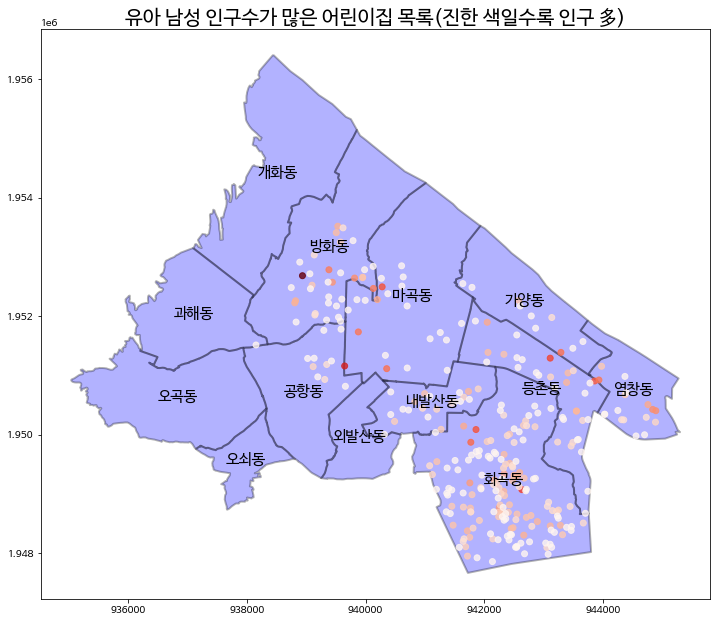

In [ ]:
#예시: 유아 남성 인구수에 따른 어린이집 목록(진한 색일수록 인구 多)

# 원하는 조회 조건에 맞추어 temp에 입력
temp = final_data[final_data['시설명'].str.contains('어린이집')].sort_values(by = '유아남성인구수', ascending = False)

# 강서구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = gangseo_dong.plot(figsize = (12,12), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in gangseo_dong.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, column = '유아남성인구수', cmap = 'Reds', alpha = .8)
plt.title('유아 남성 인구수가 많은 어린이집 목록(진한 색일수록 인구 多)', fontsize = 20)
plt.show()

## Spatial EDA
어린이 보호구역이 목적은 만 12세 이하 어린이의 보호에 있다.  
따라서 만 12세 이하 총 인구를 기준으로 최종 데이터프레임을 정렬하였다.

In [ ]:
# 상위 30개소 먼저 확인
final_data.sort_values(by = '만12세이하총인구', ascending = False).head(30)

,시설명,도로명주소,geometry,어린이보호구역지정수,CCTV수,도로표지판수,과속방지턱수,어린이보행자사고건수,유아여성인구수,유아남성인구수,초등학생여성인구수,초등학생남성인구수,중학생여성인구수,중학생남성인구수,고등학생여성인구수,고등학생남성인구수,미성년총인구,만12세이하총인구,EMD_KOR_NM
606,이더블유일에이치(2W1H)과학교습소,서울특별시 강서구 마곡중앙1로 72,POINT (939886.500 1951399.600),0,0,0,0,0,28.0,35.0,77.0,64.0,10.0,14.0,0.0,12.0,240.0,204.0,마곡동
266,다빈치화실미술교습소,서울특별시 강서구 양천로67길 32,POINT (944232.100 1950883.600),0,0,0,0,0,37.0,52.0,47.0,60.0,23.0,16.0,22.0,20.0,277.0,196.0,염창동
957,두란노 어린이집,서울특별시 강서구 금낭화로13길 51 (방화동),POINT (938935.000 1952681.900),0,0,0,0,0,53.0,50.0,27.0,26.0,11.0,9.0,9.0,0.0,185.0,156.0,방화동
220,뉴현대음악교습소,서울특별시 강서구 양천로75길 57,POINT (944755.250 1950626.400),0,0,0,0,0,29.0,33.0,39.0,50.0,15.0,13.0,17.0,11.0,207.0,151.0,염창동
189,윈영어교습소,서울특별시 강서구 양천로 663-1,POINT (944423.200 1950502.900),0,0,0,0,0,25.0,33.0,41.0,45.0,32.0,25.0,29.0,14.0,244.0,144.0,염창동
724,매쓰폴학원,서울특별시 강서구 양천로73길 33,POINT (944667.200 1950472.600),0,0,0,0,0,10.0,18.0,57.0,56.0,20.0,34.0,17.0,17.0,229.0,141.0,염창동
102,옹달샘음악학원,서울특별시 강서구 양천로71가길 22,POINT (944629.900 1950469.400),0,0,0,0,0,10.0,18.0,57.0,56.0,20.0,34.0,17.0,17.0,229.0,141.0,염창동
813,딸기어린이집,서울특별시 강서구 마곡중앙로 33 마곡엠밸리 14단지 1403-105,POINT (940355.800 1951114.000),0,0,0,0,0,20.0,24.0,49.0,47.0,20.0,13.0,6.0,11.0,190.0,140.0,마곡동
503,3030잉글리쉬영어교습소,서울특별시 강서구 양천로75길 19,POINT (944745.400 1950410.000),0,0,0,0,0,15.0,22.0,42.0,50.0,14.0,22.0,14.0,14.0,193.0,129.0,염창동
706,염창매쓰폴학원,서울특별시 강서구 양천로73길 24,POINT (944716.200 1950405.900),0,0,0,0,0,15.0,22.0,42.0,50.0,14.0,22.0,14.0,14.0,193.0,129.0,염창동


확인 결과 만 12세 이하 인구수가 100명을 넘는 곳이 희소함을 알 수 있었다. 100명을 기준으로 재정렬하여 시각화 해보았다.

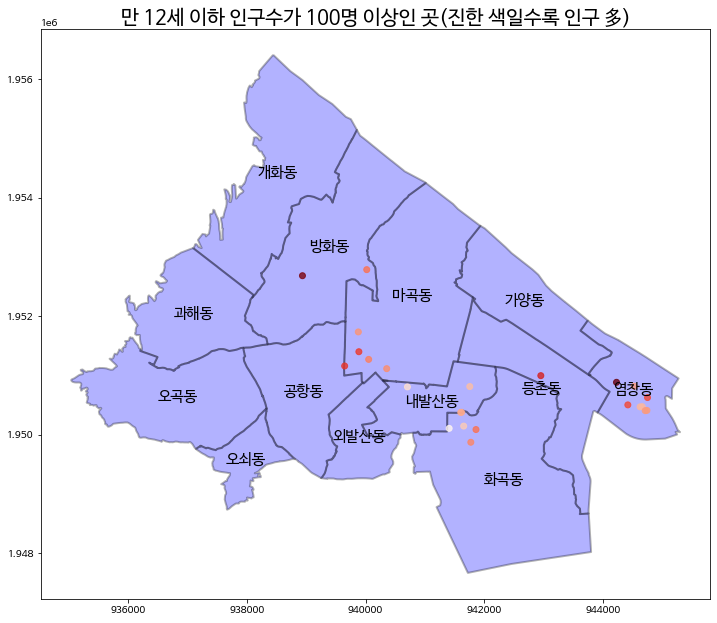

In [ ]:
#목표 만 12세 이하 인구수가 100명 이상인 곳을 내림차순으로 정렬한 뒤 시각화

# 원하는 조회 조건에 맞추어 temp에 입력
temp = final_data[final_data['만12세이하총인구']>=100].sort_values(by = '만12세이하총인구', ascending = False)

# 강서구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = gangseo_dong.plot(figsize = (12,12), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in gangseo_dong.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, column = '유아남성인구수', cmap = 'Reds', alpha = .8)
plt.title('만 12세 이하 인구수가 100명 이상인 곳(진한 색일수록 인구 多)', fontsize = 20)
plt.show()

시각화 결과 마곡동, 화곡동, 염창동에 만 12세 이하 인구가 많은 후보지역이 밀집됨을 확인하였다. 이에 법정동의 빈도를 확인하였다.

In [ ]:
final_data[final_data['만12세이하총인구']>=100]['EMD_KOR_NM'].value_counts()

염창동     8
마곡동     5
내발산동    4
화곡동     4
방화동     2
등촌동     1
Name: EMD_KOR_NM, dtype: int64

# 지리정보 EDA 결과 
**[염창동 중심부, 화곡동 북서부, 내발산동 일대, 마곡동 남서부]**  
4개 법정동 지역이 주된 밀집지로 파악되었다. 이러한 EDA 결과에 더하여 도메인 탐색을 통해 최종 관심지를(결과: **화곡동**) 선정하였다. 